cpu will be used for training the PaiNN model
Current loss 100.92992401123047 Current batch 0/3271 (0.00%)
Current loss 1.1880638599395752 Current batch 100/3271 (3.06%)
Current loss 0.5633002519607544 Current batch 200/3271 (6.11%)
Current loss 0.15038716793060303 Current batch 300/3271 (9.17%)
Current loss 0.3294963240623474 Current batch 400/3271 (12.23%)
Current loss 0.22582776844501495 Current batch 500/3271 (15.29%)
Current loss 0.15274913609027863 Current batch 600/3271 (18.34%)
Current loss 0.29093632102012634 Current batch 700/3271 (21.40%)
Current loss 0.2995820641517639 Current batch 800/3271 (24.46%)
Current loss 0.38052186369895935 Current batch 900/3271 (27.51%)
Current loss 0.1903200000524521 Current batch 1000/3271 (30.57%)
Current loss 0.3494141697883606 Current batch 1100/3271 (33.63%)
Current loss 0.5218707919120789 Current batch 1200/3271 (36.69%)
Current loss 1.0107357501983643 Current batch 1300/3271 (39.74%)
Current loss 0.2779139578342438 Current batch 1400/3271

KeyboardInterrupt: 

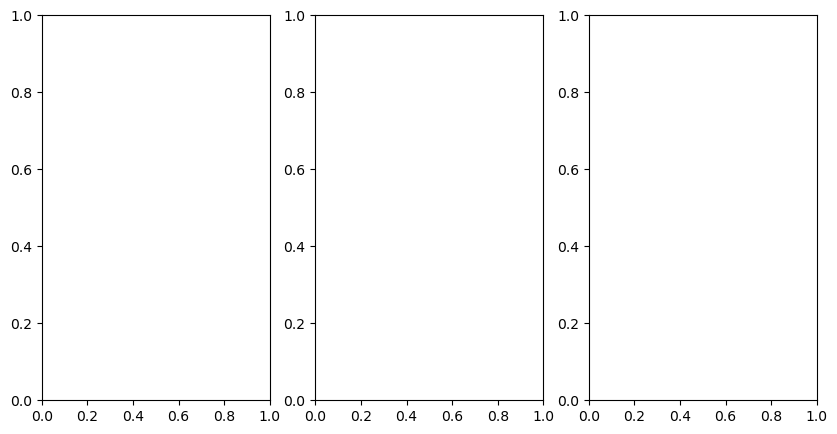

In [1]:
import os
import torch
import torch.nn as nn
import numpy
from Dataloader import DataLoaderQM9
from Model import PaiNN
from Training import Trainer
from Model import mse, mae

def training():
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"{device} will be used for training the PaiNN model")
        Model = PaiNN(r_cut=5, 
                device=device
                ).to(device)

        train_set = DataLoaderQM9(r_cut=5,batch_size=100)
        optimizer = torch.optim.Adam(params=Model.parameters(), lr = 5e-4, weight_decay = 0.01)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience = 5)
        trainer = Trainer(
            Model=Model,
            loss=mse,
            target=2,
            optimizer=optimizer,
            Dataloader=train_set,
            scheduler=scheduler,
            device=device
        )
        trainer._train(num_epoch = 100, early_stopping = 30)
        trainer.plot_data()

if __name__=="__main__":
    training()